In [1]:
%run functions.ipynb

np.set_printoptions(precision=3)
np.random.seed(42)

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding

In [3]:
X_train, X_test, y_train, y_test = load_train_and_test_parts()
print("Train and test sizes: {} {}".format(X_train.shape, X_test.shape))
print(
    "(1, 0) labels count in train test: {} {}".format(
        (np.count_nonzero(y_train == 1), np.count_nonzero(y_train == 0)),
        (np.count_nonzero(y_test == 1), np.count_nonzero(y_test == 0)),
    )
)
standarizer = StandardScaler().fit(X_train)
X_std_train = standarizer.transform(X_train)
X_std_test = standarizer.transform(X_test)

Train and test sizes: (726, 12179) (243, 12179)
(1, 0) labels count in train test: (289, 437) (104, 139)


In [4]:
isomap = Isomap(n_components=240).fit(X_train)
X_isomap_train = isomap.transform(X_train)
X_isomap_test = isomap.transform(X_test)
lle = LocallyLinearEmbedding(n_components=240).fit(X_train)
X_lle_train = lle.transform(X_train)
X_lle_test = lle.transform(X_test)

# ISOMAP

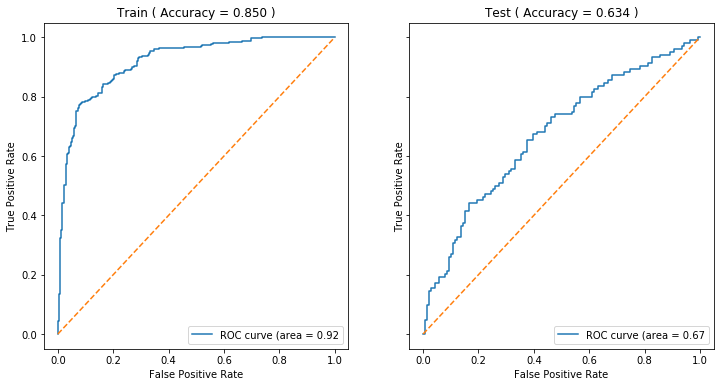

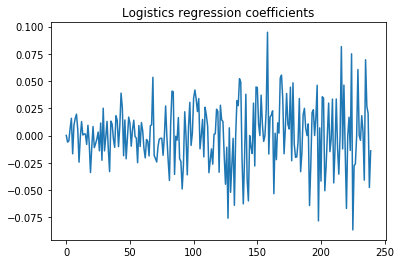

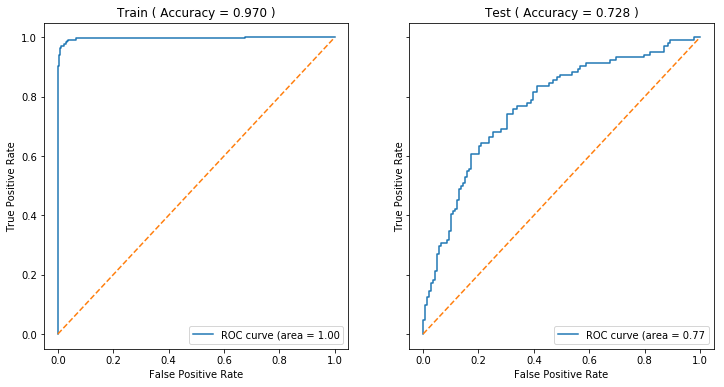

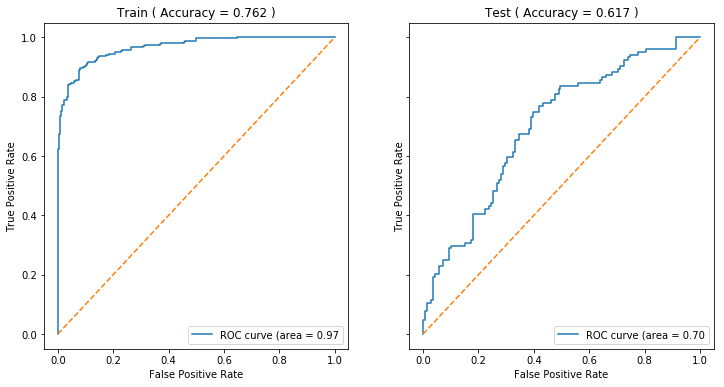

In [5]:
(clf_logit, clf_svm, clf_forest) = fit_models(X_isomap_train, y_train, X_isomap_test, y_test)

# LLE

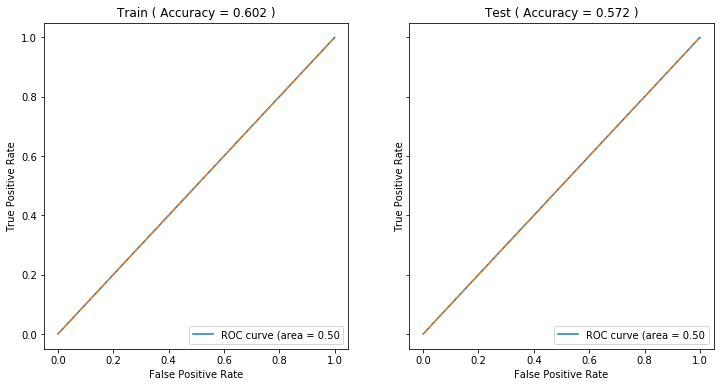

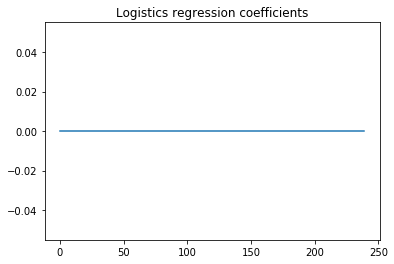

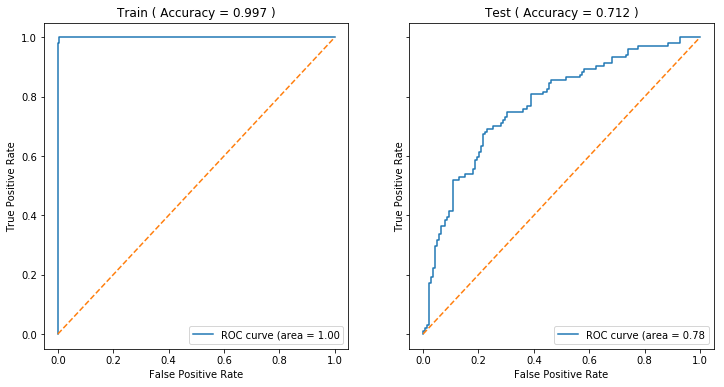

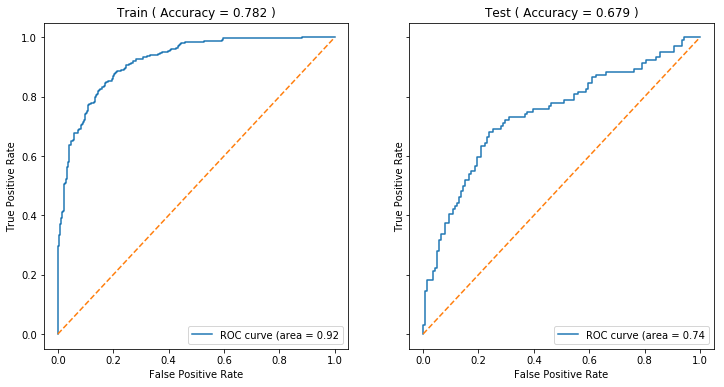

In [6]:
(clf_logit, clf_svm, clf_forest) = fit_models(X_lle_train, y_train, X_lle_test, y_test)

# PCA

417


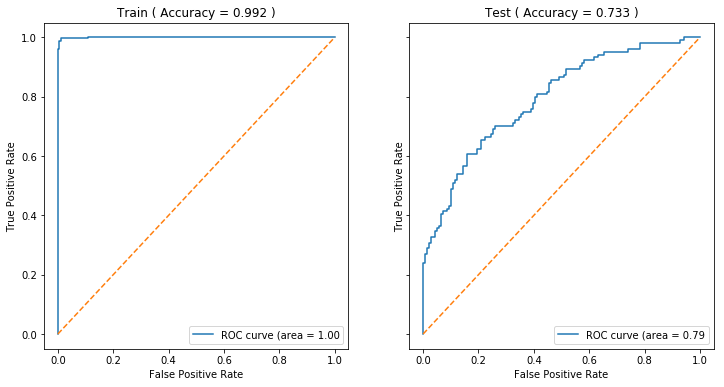

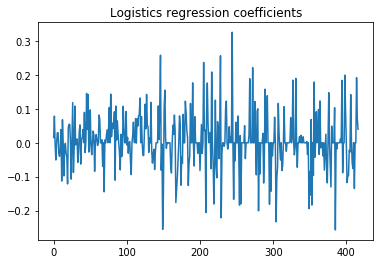

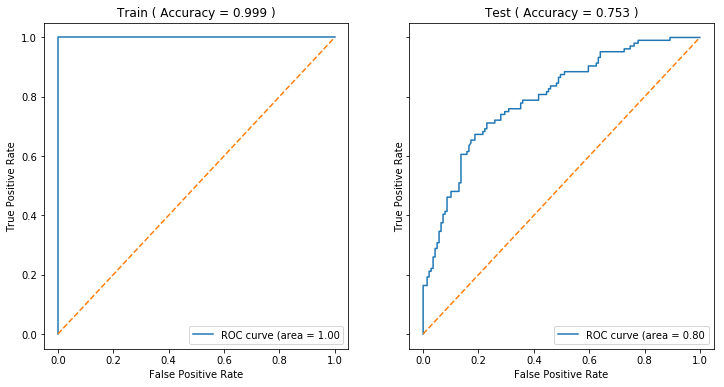

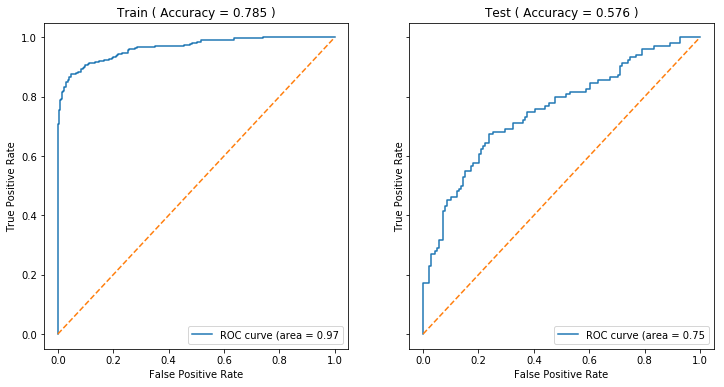

In [7]:
pca_transform = PCA(n_components=0.95, svd_solver='full').fit(X_std_train)
print(pca_transform.n_components_)
X_pca_train = pca_transform.transform(X_std_train)
X_pca_test = pca_transform.transform(X_std_test)
(clf_logit, clf_svm, clf_forest) = fit_models(X_pca_train, y_train, X_pca_test, y_test)

# MLCC

In [8]:
mlcc_results = []
filenames = []
for filename in os.listdir('./mlcc_results/'):
    if filename.endswith('.RData'):
        mlcc_results.append(tuple(read_mlcc_result(filename, 726)))
        filenames.append(filename)
print(filenames)
#segmentation, mBIC, dimensionalities = read_mlcc_result(100, 969)

['output50_4_40_30.RData', 'output50_8_40_30.RData', 'output100_8_40_30.RData', 'output150_8_40_30.RData', 'output100_4_40_30.RData', 'output10_8_40_30.RData', 'output75_4_40_30.RData', 'output20_4_40_30.RData', 'output20_8_40_30.RData']


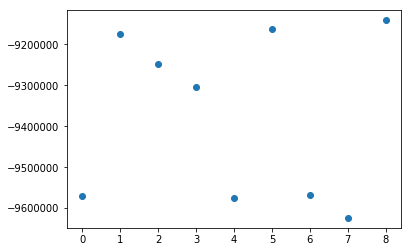

Highest mBIC is from output20_8_40_30.RData


In [9]:
mBICs = list(map(lambda x : x[1][0], mlcc_results))
plt.figure()
plt.scatter(np.arange(len(mBICs)), mBICs)
plt.show()
max_index = np.argmax(mBICs)
print('Highest mBIC is from {}'.format(filenames[max_index]))

In [10]:
segmentation = mlcc_results[max_index][0]
dimensionalities = mlcc_results[max_index][2]
print(segmentation, dimensionalities)
print(len(dimensionalities))

X_mlcc_train = apply_mlcc_dim_reduction(X_std_train, segmentation, dimensionalities)
X_mlcc_test = apply_mlcc_dim_reduction(X_std_test, segmentation, dimensionalities)

[10  5  5 ...  1  7 18] [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
20


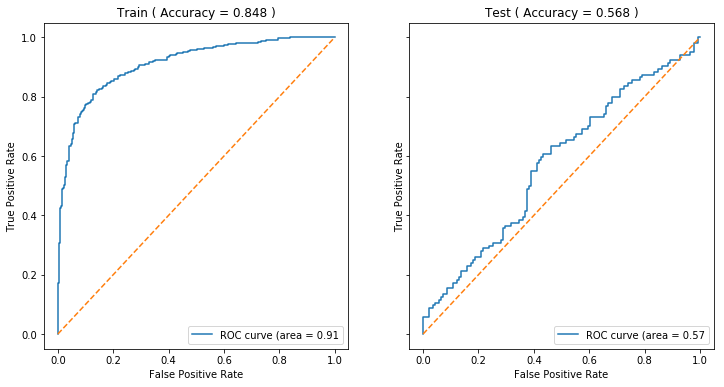

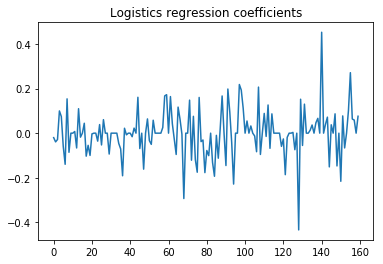

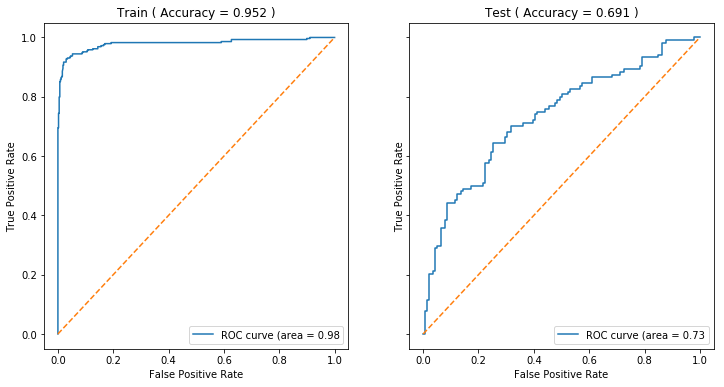

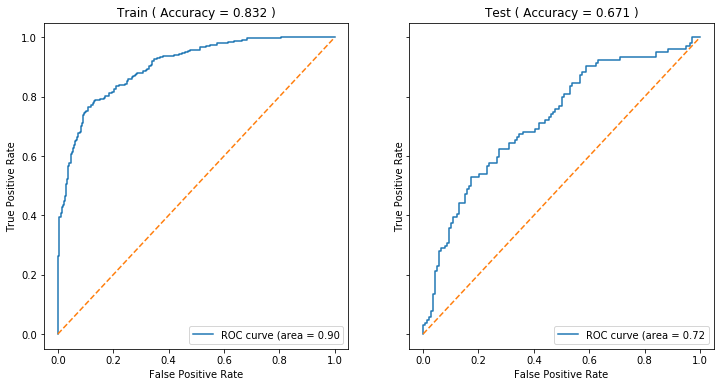

In [11]:
(clf_logit, clf_svm, clf_forest) = fit_models(X_mlcc_train, y_train, X_mlcc_test, y_test)